In [1]:
# Importing packages
import matplotlib
import matplotlib.pyplot as plt  
import sys, os
import pandas as pd, numpy as np 
import time
from tqdm import tqdm
%matplotlib inline

# Setting plot preferences
matplotlib.rcParams['figure.figsize']  = (20.0, 10.0)
matplotlib.rcParams['axes.grid']       = False
matplotlib.rcParams['font.size']       = 15
matplotlib.rcParams['axes.labelsize']  = 0.9*plt.rcParams['font.size']
matplotlib.rcParams['axes.titlesize']  = 1.2*plt.rcParams['font.size']
matplotlib.rcParams['legend.fontsize'] = plt.rcParams['font.size']
matplotlib.rcParams['xtick.labelsize'] = 0.8*plt.rcParams['font.size']
matplotlib.rcParams['ytick.labelsize'] = 0.8*plt.rcParams['font.size']
matplotlib.rcParams['scatter.marker']  = 'o'
matplotlib.rcParams['axes.titlepad']   = 20 
matplotlib.rcParams['xtick.major.pad']='8'
matplotlib.rcParams['ytick.major.pad']='8'

In [2]:
mypath                  = "/home/oline/Documents/UiO/FYS3150/FYS3150/Project_2/Results/2E"
myfolder                = "2E/"


def read_files(path, folder):  
    lambda_0 = []
    omega = []  
    test_index = []
        
    for filename in os.listdir(path):
        temp = []
        omega.append(float(filename.split("_")[2]))
        test_index.append(int(filename.split("_")[3]))
        with open(folder + filename, 'r') as infile:
            lines = infile.readlines()[1:][0]
            l0 = lines.split()[2]
            lambda_0.append(float(l0))

    df = pd.DataFrame({"omega": omega,"Test_index": test_index, "lambda": lambda_0})
    return df

Data = read_files(mypath, myfolder)

In [3]:
Data = Data.sort_values(by ='omega' ).reset_index()

In [4]:
Data_001 = Data[Data['omega'] == 0.01]
Data_050 = Data[Data['omega'] == 0.5]
Data_100 = Data[Data['omega'] == 1]
Data_500 = Data[Data['omega'] == 5]

In [5]:
mean_001 = np.mean(Data_001['lambda'].values)
mean_050 = np.mean(Data_050['lambda'].values)
mean_100 = np.mean(Data_100['lambda'].values)
mean_500 = np.mean(Data_500['lambda'].values)

In [6]:
print("0.01 & ", mean_001, "\\\\")
print("0.50 & ", mean_050, "\\\\")
print("1.00 & ", mean_100, "\\\\")
print("5.00 & ", mean_500)

0.01 &  0.840704568261768 \\
0.50 &  2.2308250178128604 \\
1.00 &  4.05707424038981 \\
5.00 &  17.4286222663169


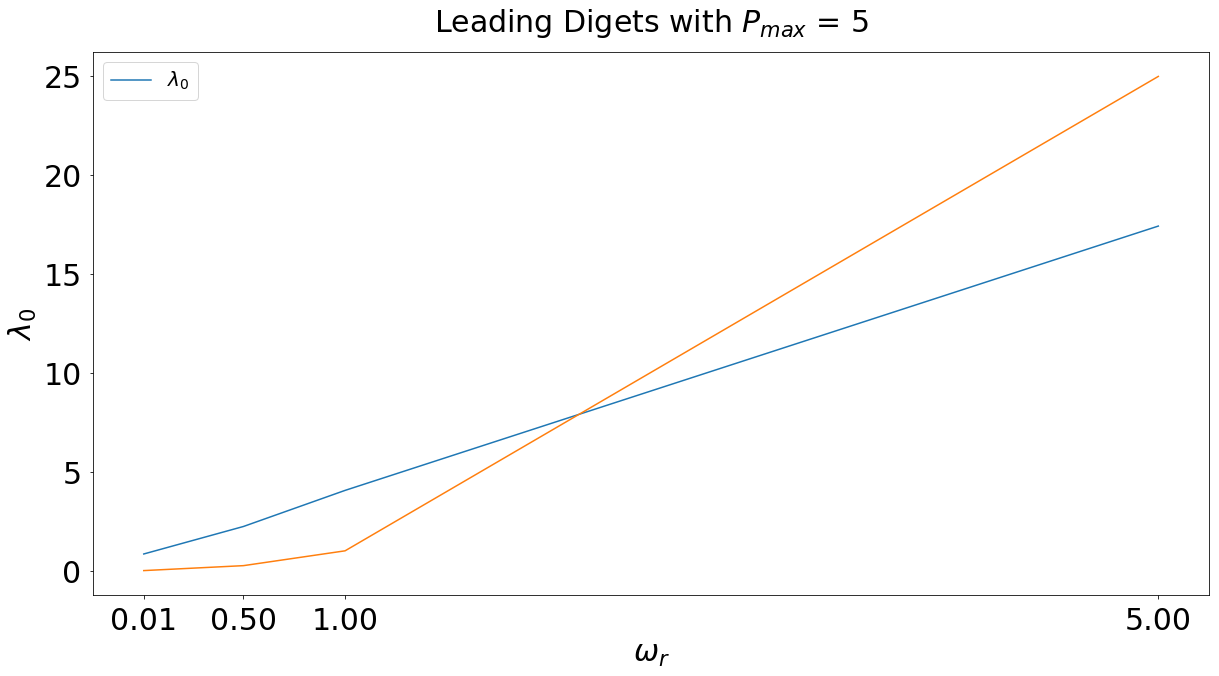

In [7]:
mean = [mean_001, mean_050, mean_100, mean_500]
omega = [0.01,0.50,1.00,5.00]


fsize = 30
plt.figure(figsize = (20,10))
plt.plot(omega, mean, label = "$\lambda_0$")
plt.legend(loc = 'upper left', fontsize = fsize-10)
plt.xlabel("$\omega_r$", fontsize = fsize)
plt.ylabel("$\lambda_0$", fontsize = fsize)
plt.title("Leading Digets with $P_{max}$ = 5", fontsize = fsize)
plt.xticks(omega, fontsize = fsize)
plt.yticks(fontsize = fsize)
plt.plot([0.01,0.5,1,5.00],np.array([0.01,0.5,1,5.00])**2)
